In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/srika/Downloads/Online Retail.xlsx - Online Retail.csv ", encoding='ISO-8859-1')

In [3]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
data.describe

<bound method NDFrame.describe of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

          InvoiceDate  UnitPrice  Custome

# EDA and Cleaning

In [7]:
print("shape before dropping duplicates", data.shape)
data = data.drop_duplicates()
print("shape after dropping duplicates" , data.shape)

shape before dropping duplicates (541909, 8)
shape after dropping duplicates (536641, 8)


# checking unique values

In [8]:
print("data shape",data.shape)
for col in["InvoiceNo","StockCode","InvoiceDate","CustomerID","Country"]:
    print("unique values for", col," - " , data[col].nunique())

data shape (536641, 8)
unique values for InvoiceNo  -  25900
unique values for StockCode  -  4070
unique values for InvoiceDate  -  23260
unique values for CustomerID  -  4372
unique values for Country  -  38


# nulls in percentage

In [9]:
print(np.sum(data.isnull()), "\n")
print("percentage of customers missing :", round(data["CustomerID"].isnull().sum()*100/len(data),2),"%")

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64 

percentage of customers missing : 25.16 %


# duplicates handling


In [12]:
null_id_invoices = data[data.CustomerID.isnull()]["InvoiceNo"].drop_duplicates().tolist()
print("Invoice count null customerid" , len(null_id_invoices))
data[~data.CustomerID.isnull()][data.InvoiceNo.isin(null_id_invoices)]

Invoice count null customerid 3710


C:\Users\srika\AppData\Local\Temp\ipykernel_8912\3898634480.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[~data.CustomerID.isnull()][data.InvoiceNo.isin(null_id_invoices)]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [13]:
data.groupby(["InvoiceNo"])["CustomerID"].nunique().reset_index(name = "nunique").sort_values(["nunique"], ascending = False).head()

,InvoiceNo,nunique
0,536365,1
16915,571200,1
16924,571215,1
16923,571214,1
16922,571213,1


In [18]:
data["newID"] = data["CustomerID"]
data.loc[data["CustomerID"].isnull(),["newID"]] = data["InvoiceNo"]
data["newID"] = data["newID"].astype(str).str.replace('\D','')
data["newID"] = pd.to_numeric(data["newID"])
customer = data["CustomerID"].nunique()
null_invoice = data[data.CustomerID.isnull()]["InvoiceNo"].nunique()
new_ids = data["newID"].nunique()
print("number od customer:" , customer)
print("number of orders customerID in Null:", null_invoice)
print("number of Customera + number of orders CustomerID is null:", customer + null_invoice)
print("number of New IDs:" , new_ids)

C:\Users\srika\AppData\Local\Temp\ipykernel_8912\3896793440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["newID"] = data["CustomerID"]
C:\Users\srika\AppData\Local\Temp\ipykernel_8912\3896793440.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data["CustomerID"].isnull(),["newID"]] = data["InvoiceNo"]
C:\Users\srika\AppData\Local\Temp\ipykernel_8912\3896793440.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data["newID"] = data["n

number od customer: 4372
number of orders customerID in Null: 3710
number of Customera + number of orders CustomerID is null: 8082
number of New IDs: 8082


C:\Users\srika\AppData\Local\Temp\ipykernel_8912\3896793440.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["newID"] = pd.to_numeric(data["newID"])


# object type to datetime for invoicedata and checking 1st and last dates

In [20]:
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])
print("minimum invoice date" , min(data["InvoiceDate"]))
print("maximum invoice date" , max(data["InvoiceDate"]))

C:\Users\srika\AppData\Local\Temp\ipykernel_8912\2153541774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])


minimum invoice date 2010-12-01 08:26:00
maximum invoice date 2011-12-09 12:50:00


# cancellations invoiceno start "C"

In [23]:
data["cancellations"] = np.where(data["InvoiceNo"].str.startswith("C"),1,0)
total_data = data["InvoiceNo"].shape[0]
cancelled_data = data[data.cancellations ==1].shape[0]
print("number of cancelled data" , cancelled_data , cancelled_data*100/total_data, "\n")
print(data[data.cancellations==1]["Quantity"].describe())
data = data[data.cancellations ==0]

number of cancelled data 9251 1.7238712658928408 

count     9251.000000
mean       -29.787050
std       1147.997592
min     -80995.000000
25%         -6.000000
50%         -2.000000
75%         -1.000000
max         -1.000000
Name: Quantity, dtype: float64


C:\Users\srika\AppData\Local\Temp\ipykernel_8912\3793441802.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["cancellations"] = np.where(data["InvoiceNo"].str.startswith("C"),1,0)


# UnitPrice analysis 

In [24]:
print("minimum UnitPrice" , min(data["UnitPrice"]))
print("maximum unitprice" , max(data["UnitPrice"]))
data["UnitPrice"].describe()

minimum UnitPrice -11062.06
maximum unitprice 13541.33


count    527390.000000
mean          3.861939
std          41.963759
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       13541.330000
Name: UnitPrice, dtype: float64

In [25]:
data[data.UnitPrice < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,newID,InvoiceData,cancellations
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,563186,2011-08-12 14:51:00,0
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,563187,2011-08-12 14:52:00,0


In [26]:
data = data[data.UnitPrice >=0]

In [27]:
#all are price ==0

In [30]:
print("% of data with price = 0:" , round(len(data[data.UnitPrice == 0])*100/ len(data),2),"%")
print("count of unique customer id values" , data[data.UnitPrice==0]. CustomerID.nunique(),"\n")
data[data.UnitPrice == 0][~data.CustomerID.isnull()].head()

% of data with price = 0: 0.48 %
count of unique customer id values 31 



C:\Users\srika\AppData\Local\Temp\ipykernel_8912\1774024752.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data.UnitPrice == 0][~data.CustomerID.isnull()].head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,newID,InvoiceData,cancellations
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany,126470,2010-12-05 14:02:00,0
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom,165600,2010-12-16 14:36:00,0
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE,149110,2010-12-21 13:45:00,0
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,130810,2011-01-06 16:41:00,0
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,130810,2011-01-06 16:41:00,0


In [31]:
data_filtered = data[data.UnitPrice > 0]
data_filtered["UnitPrice"].describe()

count    524878.000000
mean          3.922573
std          36.093028
min           0.001000
25%           1.250000
50%           2.080000
75%           4.130000
max       13541.330000
Name: UnitPrice, dtype: float64

In [32]:
print("minimum quantity " , min(data_filtered["Quantity"]))
print("maximum quantity " , max(data_filtered["Quantity"]))
data_filtered["Quantity"].describe()

minimum quantity  1
maximum quantity  80995


count    524878.000000
mean         10.616600
std         156.280031
min           1.000000
25%           1.000000
50%           4.000000
75%          11.000000
max       80995.000000
Name: Quantity, dtype: float64

In [33]:
data_filtered["Total_sales"] = data_filtered["UnitPrice"] * data_filtered["Quantity"]
country_customer_df = data_filtered.groupby("Country")["CustomerID"].nunique().reset_index().rename(columns = {"CustomerID":"count_CustomerID"})
country_customer_df["customer_%"] = round(country_customer_df["count_CustomerID"] * 100/country_customer_df["count_CustomerID"].sum(),2)
country_df = data_filtered.groupby("Country")["Total_sales"].sum().reset_index()
country_df["Total_sales%"] = round(country_df["Total_sales"]*100/country_df["Total_sales"].sum(),2)

C:\Users\srika\AppData\Local\Temp\ipykernel_8912\2129008400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered["Total_sales"] = data_filtered["UnitPrice"] * data_filtered["Quantity"]


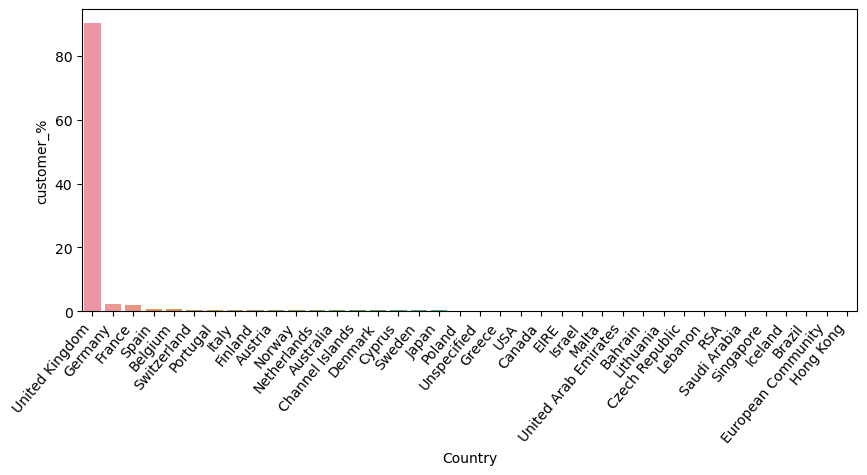

In [37]:
country_customer_df = country_customer_df.sort_values(by = "customer_%", ascending = False)
fig, ax = plt.subplots(figsize =(10,4) , dpi = 100)
ax = sns.barplot(x = country_customer_df["Country"], y = country_customer_df["customer_%"])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 50 , ha = "right")
plt.show()

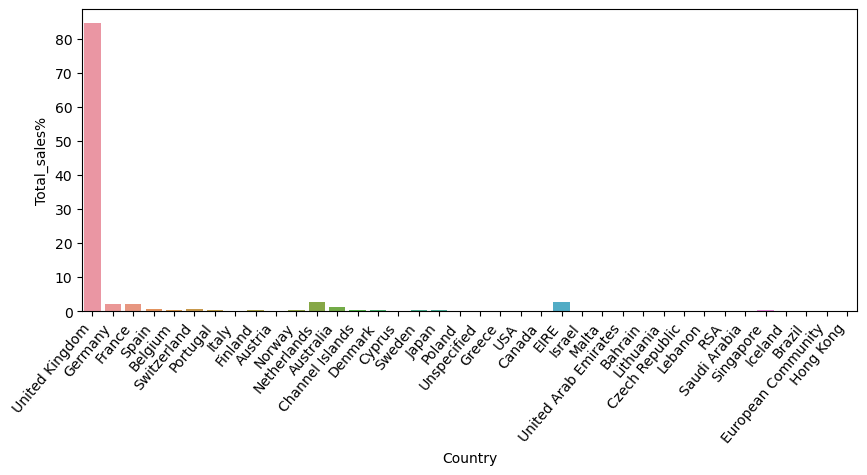

In [40]:
country_df = country_df.sort_values(by = "Total_sales%" , ascending = False)
fig, ax = plt.subplots(figsize =(10,4) , dpi = 100)
ax = sns.barplot(x = country_customer_df["Country"], y = country_df["Total_sales%"])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 50 , ha = "right")
plt.show()

# United kingdom have most customers so i am taking United kingdom as uk

In [41]:
uk_df = data_filtered[data_filtered.Country == "United Kingdom"]
uk_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 479985 entries, 0 to 541893
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      479985 non-null  object        
 1   StockCode      479985 non-null  object        
 2   Description    479985 non-null  object        
 3   Quantity       479985 non-null  int64         
 4   InvoiceDate    479985 non-null  datetime64[ns]
 5   UnitPrice      479985 non-null  float64       
 6   CustomerID     349203 non-null  float64       
 7   Country        479985 non-null  object        
 8   newID          479985 non-null  int64         
 9   InvoiceData    479985 non-null  datetime64[ns]
 10  cancellations  479985 non-null  int32         
 11  Total_sales    479985 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int32(1), int64(2), object(4)
memory usage: 45.8+ MB


In [43]:
uk_product = uk_df.groupby(["StockCode","Description" ], as_index = False)["Quantity"].sum().sort_values(by = "Quantity" , ascending = False) 

In [44]:
uk_product.head()

,StockCode,Description,Quantity
2653,23843,"PAPER CRAFT , LITTLE BIRDIE",80995
2112,23166,MEDIUM CERAMIC TOP STORAGE JAR,77036
3113,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,49430
3601,85099B,JUMBO BAG RED RETROSPOT,44161
3622,85123A,WHITE HANGING HEART T-LIGHT HOLDER,35430


In [46]:
groupby_customers = pd.DataFrame(uk_df.groupby('newID')["InvoiceNo"].nunique())
groupby_customers.describe()

,InvoiceNo
count,5293.000000
mean,3.404308
std,6.356634
min,1.000000
25%,1.000000
50%,1.000000
75%,4.000000
max,209.000000


In [47]:
groupby_invoice = pd.DataFrame(uk_df.groupby("InvoiceNo")["StockCode"].nunique())
groupby_invoice.columns = ["Number of products per order"]
groupby_invoice.describe()

,Number of products per order
count,18019.000000
mean,26.351129
std,48.882851
min,1.000000
25%,6.000000
50%,15.000000
75%,29.000000
max,1110.000000


# RFM R= recency F = Frequnecy M = Monetary

In [53]:
analysis_data = uk_df["InvoiceData"].max() + pd.DateOffset(1)
print("RFM Analysis Data :" , analysis_data)
start_date = analysis_data - pd.DateOffset(days = 365)
print("start date when taking 365days data for analysis :" , start_date)

RFM Analysis Data : 2011-12-10 12:49:00
start date when taking 365days data for analysis : 2010-12-10 12:49:00


In [60]:
uk_df = uk_df[~uk_df.CustomerID.isnull()]
data_rfm = uk_df[uk_df.InvoiceDate >= start_date].groupby(["newID"], as_index = False).agg({"InvoiceDate": lambda x: (analysis_data - x.max()).days,"InvoiceNo": "count","Total_sales": "sum"}).rename(columns = {"InvoiceDate":"Recency" , "InvoiceNo":"Frequency", "Total_sales": "Monetary"})
data_rfm.head()

,newID,Recency,Frequency,Monetary
0,123460,326,1,77183.60
1,127470,2,96,3837.45
2,127480,1,3899,30298.80
3,127490,4,199,4090.88
4,128200,3,59,942.34


In [62]:
data_rfm["R_score"] = pd.qcut(data_rfm["Recency"] , 4 , labels = False)
data_rfm["F_score"] = pd.qcut(data_rfm["Frequency"] , 4 , labels = False)
data_rfm["M_score"] = pd.qcut(data_rfm["Monetary"] , 4 , labels = False)
data_rfm["R_score"] = 3 - data_rfm["R_score"]
data_rfm["RFM"] = data_rfm.R_score.map(str) + data_rfm.F_score.map(str) + data_rfm.M_score.map(str)
data_rfm["RFM_score"] = data_rfm["R_score"] + data_rfm["F_score"] + data_rfm["M_score"]
data_rfm.head()

,newID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM,RFM_score
0,123460,326,1,77183.60,0,0,3,003,3
1,127470,2,96,3837.45,3,2,3,323,8
2,127480,1,3899,30298.80,3,3,3,333,9
3,127490,4,199,4090.88,3,3,3,333,9
4,128200,3,59,942.34,3,2,2,322,7


In [63]:
data_rfm.groupby("RFM_score")[["Recency","Frequency","Monetary"]].mean()

,Recency,Frequency,Monetary
RFM_score,,,
0,241.753799,7.817629,149.276413
1,170.382857,13.728571,225.817457
2,146.484649,19.960526,352.133774
3,87.495349,27.239535,812.044351
4,79.898734,38.779747,716.045114
5,56.645000,52.262500,934.094225
6,43.568733,73.345013,1758.525747
7,31.811370,110.397933,1866.709664
8,20.550595,183.101190,3388.595476


# k - means clustings

In [64]:
from sklearn.cluster import KMeans

C:\Users\srika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\srika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\srika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='Monetary', ylabel='Density'>

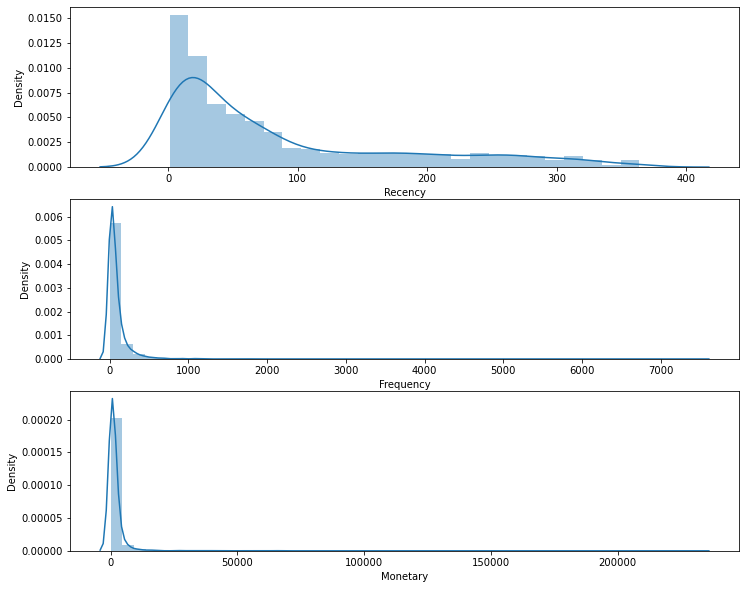

In [65]:
plt.figure(figsize = (12,10))
plt.subplot(3,1,1); sns.distplot(data_rfm["Recency"])
plt.subplot(3,1,2); sns.distplot(data_rfm["Frequency"])
plt.subplot(3,1,3); sns.distplot(data_rfm["Monetary"])


In [66]:
data_rfm["log_R"] = np.log(data_rfm.Recency)
data_rfm["log_F"] = np.log(data_rfm.Frequency)
data_rfm["log_M"] = np.log(data_rfm.Monetary)

C:\Users\srika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\srika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\srika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='log_M', ylabel='Density'>

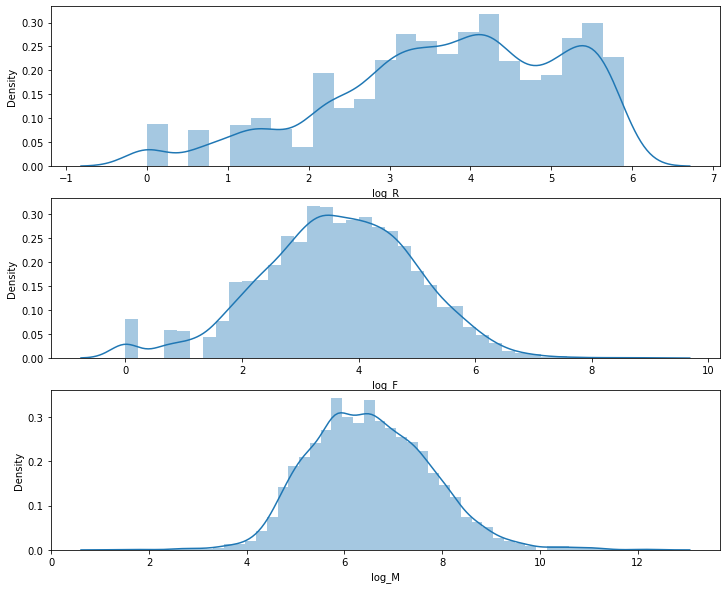

In [67]:
plt.figure(figsize = (12,10))
plt.subplot(3,1,1); sns.distplot(data_rfm["log_R"])
plt.subplot(3,1,2); sns.distplot(data_rfm["log_F"])
plt.subplot(3,1,3); sns.distplot(data_rfm["log_M"])

In [68]:
data_norm = data_rfm[["log_R","log_F","log_M"]]
sse = {}
for k in range(1,8):
    kmeans = KMeans(n_clusters = k , random_state = 1)
    kmeans.fit(data_norm)
    sse[k] = kmeans.inertia_

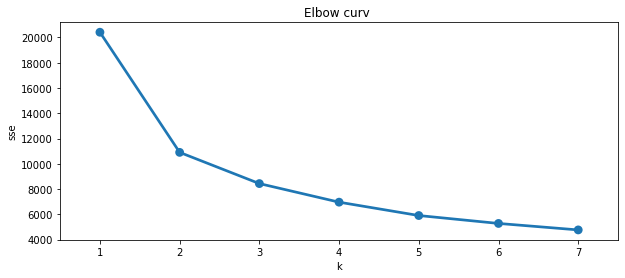

In [69]:
plt.figure(figsize = (10,4))
plt.title('Elbow curv ')
plt.xlabel("k");
plt.ylabel("sse")
sns.pointplot(x= list(sse.keys()) , y = list(sse.values()))
plt.show()

In [70]:
n_clusters = 3 
kmeans = KMeans(n_clusters = n_clusters , random_state = 1)
kmeans.fit(data_norm)
data_rfm["cluster"] = kmeans.predict(data_norm)

In [71]:
data_rfm.groupby(["cluster"])[["Recency","Frequency","Monetary"]].mean()

,Recency,Frequency,Monetary
cluster,,,
0,161.860310,14.482631,284.778781
1,10.477193,240.345029,5452.254316
2,65.715764,67.139988,1183.602485


<AxesSubplot:>

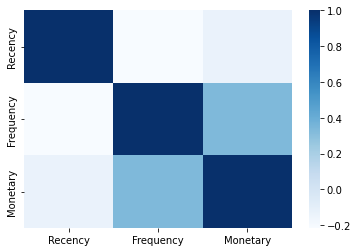

In [73]:
sns.heatmap(data_rfm[["Recency","Frequency","Monetary"]].corr(),cmap = "Blues")

Text(0, 0.5, 'Monetary')

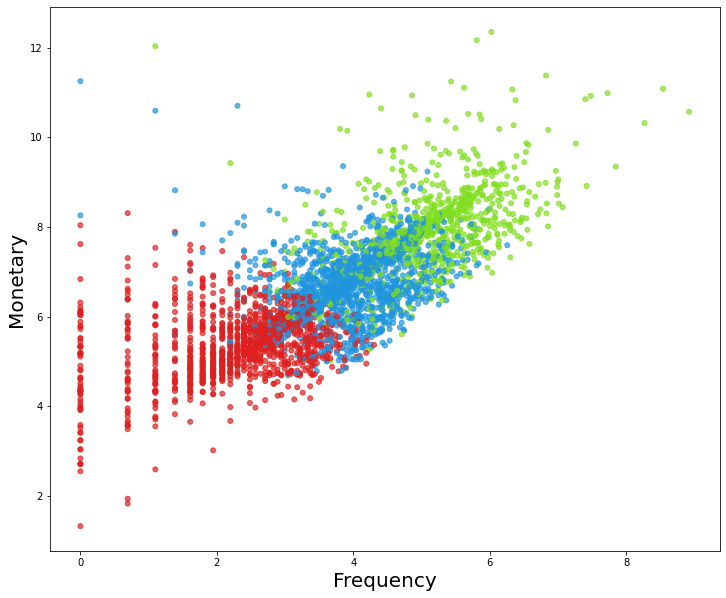

In [75]:
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids]
cen_y = [i[1] for i in centroids]
data_rfm["cen_x"] = data_rfm.cluster.map({0:cen_x[0] , 1:cen_x[1] , 2:cen_x[2]})
data_rfm["cen_y"] = data_rfm.cluster.map({0:cen_y[0] , 1:cen_y[1] , 2:cen_y[2]})
colors = ["#DF2020","#81DF20","#2095DF"]
data_rfm["C"] = data_rfm.cluster.map({0:colors[0], 1:colors[1] , 2:colors[2]})

plt.figure(figsize=(12,10))
plt.scatter(data_rfm.log_F , data_rfm.log_M , c = data_rfm.C , alpha = 0.7 , s=25)
plt.xlabel("Frequency" , fontsize = 20)
plt.ylabel("Monetary", fontsize = 20)

#green is high value customers = cluster1
#blue is low value customers = cluster 2
#red is average value customers = cluser0